In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import random

In [2]:
#Artificially generate random dataset

data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype = np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype = np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype = np.float64)

data = np.append(np.append(data_1, data_2, axis = 0), data_3, axis = 0)

In [5]:
data.shape

(150, 2)

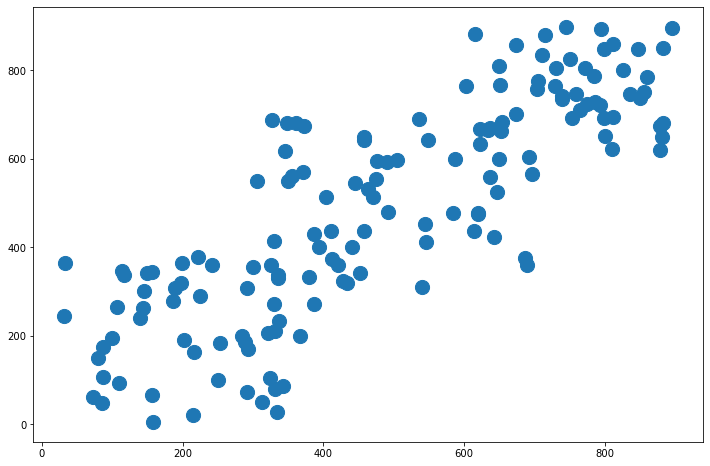

In [6]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(data[:,0], data[:,1], s=200)

In [7]:
label_1 = np.array([0 for i in range(50)])

label_2 = np.array([1 for i in range(50)])

label_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(label_1, label_2, axis = 0), label_3, axis = 0)

In [8]:
labels.shape

(150,)

In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
df = pd.DataFrame({'data_x' : data[:,0], 'data_y' : data[:,1], 'labels' : labels})
df.sample(10)

,data_x,data_y,labels
132,860.0,785.0,2
90,471.0,513.0,1
94,306.0,551.0,1
68,587.0,600.0,1
100,883.0,850.0,2
5,288.0,187.0,0
28,114.0,347.0,0
57,619.0,477.0,1
119,850.0,738.0,2
95,336.0,337.0,1


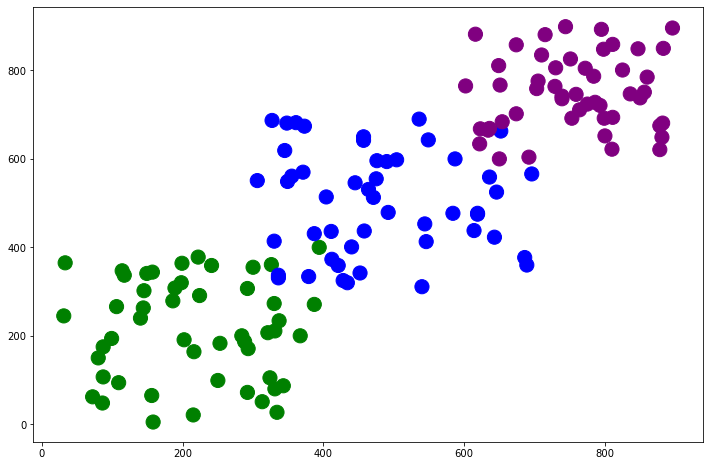

In [12]:
colors = ['green', 'blue','purple']

plt.figure(figsize = (12,8))

plt.scatter(df['data_x'], df['data_y'], c = df['labels'], s=200,
           cmap = matplotlib.colors.ListedColormap(colors))

#cmap use listed color map in matplotlib

In [13]:
kmeans_model = KMeans(n_clusters = 3, max_iter = 10000).fit(data)

In [14]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [16]:
centroids = kmeans_model.cluster_centers_

centroids

array([[218.23529412, 215.17647059],
       [753.30769231, 745.75      ],
       [473.4893617 , 501.80851064]])

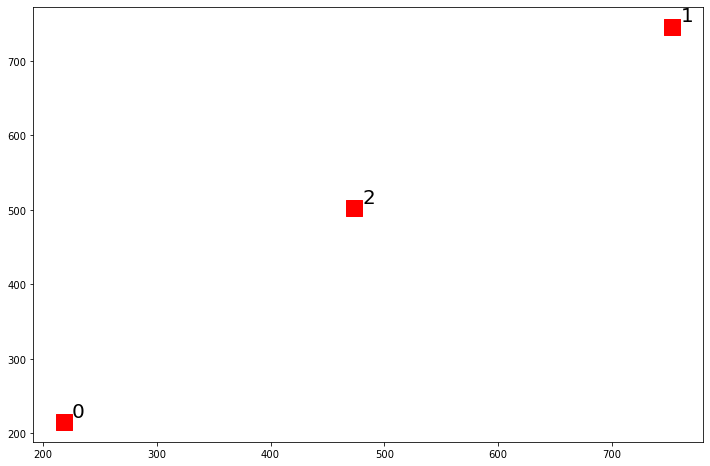

In [17]:
plt.figure(figsize = (12,8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)

In [21]:
#labels - original labels that we've assigned 
#kmeans_model.labels_ - labels that are generated by our model

print('Homogeneity Score : ', metrics.homogeneity_score(labels, kmeans_model.labels_))

print('Completeness Score : ', metrics.completeness_score(labels, kmeans_model.labels_))

print('V-Measure Score : ', metrics.v_measure_score(labels, kmeans_model.labels_))

print('Adjusted Rand Score : ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print('Adjusted Mutual Score : ', metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

print('Silhouette Score : ', metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity Score :  0.8679893395187667
Completeness Score :  0.8687340580664097
V-Measure Score :  0.8683615391224542
Adjusted Rand Score :  0.9025384949079155
Adjusted Mutual Score :  0.8667133232967961
Silhouette Score :  0.5000464306600781


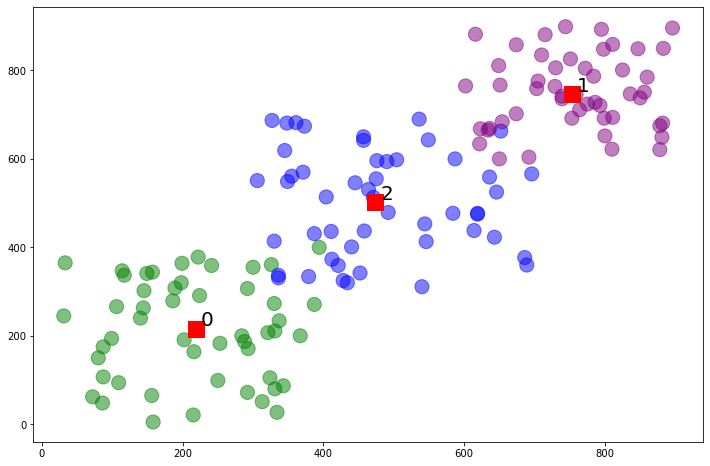

In [22]:
colors = ['green', 'blue','purple']

plt.figure(figsize = (12,8))

plt.scatter(df['data_x'], df['data_y'], c = df['labels'], s=200,
           cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)

In [23]:
data_test = np.array([[442., 621.],
                     [50., 153.],
                     [333., 373.],
                     [835., 816.]])

In [24]:
label_pred = kmeans_model.predict(data_test)

In [25]:
label_pred

array([2, 0, 2, 1], dtype=int32)

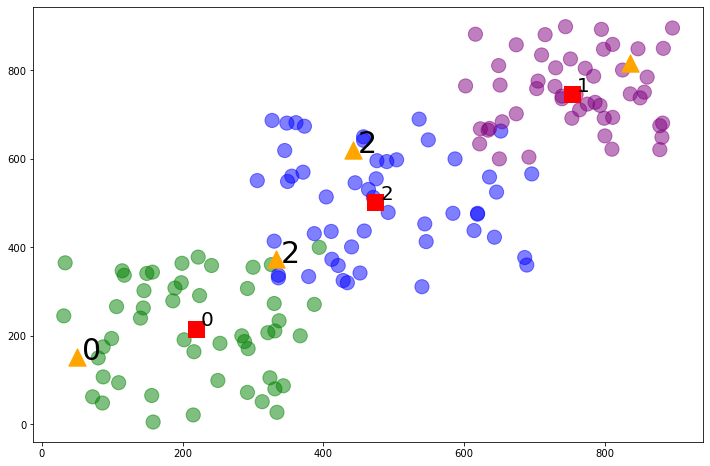

In [26]:
colors = ['green', 'blue','purple']

plt.figure(figsize = (12,8))

plt.scatter(df['data_x'], df['data_y'], c = df['labels'], s=200,
           cmap = matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(centroids)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize = 30)

    plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 20)